# 항공사 고객 만족도 예측 경진대회 EDA

- 이용 고객의 성별, 나이 등 인적사항과 비행 거리, 지연 시간 등의 정보들을 통해 고객 만족도를 예측
- Target : boolean(만족(1), 불만족(0))

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## 1. 데이터 확인

In [3]:
train = pd.read_csv('./data/train.csv')
train.drop('id', axis = 1, inplace = True)
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,...,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             3000 non-null   object 
 1   Customer Type                      3000 non-null   object 
 2   Age                                3000 non-null   int64  
 3   Type of Travel                     3000 non-null   object 
 4   Class                              3000 non-null   object 
 5   Flight Distance                    3000 non-null   int64  
 6   Seat comfort                       3000 non-null   int64  
 7   Departure/Arrival time convenient  3000 non-null   int64  
 8   Food and drink                     3000 non-null   int64  
 9   Gate location                      3000 non-null   int64  
 10  Inflight wifi service              3000 non-null   int64  
 11  Inflight entertainment             3000 non-null   int64

In [5]:
print('-------------')
print(train['Gender'].unique())
print('-------------')
print(train['Customer Type'].unique())
print('-------------')
print(train['Type of Travel'].unique())
print('-------------')
print(train['Class'].unique())

-------------
['Female' 'Male']
-------------
['disloyal Customer' 'Loyal Customer']
-------------
['Business travel' 'Personal Travel']
-------------
['Eco' 'Business' 'Eco Plus']


분석
- NUll 값 없음
  - 전처리 X
- 카테고리형 데이터 : 'Gender', 'Customer Type', 'Type of Travel', 'Class'
- 수치형 데이터
  - 'Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
  - 'Food and drink', 'Gate location', 'Inflight wifi service',
  - 'Inflight entertainment', 'Online support', 'Ease of Online booking',
  - 'On-board service', 'Leg room service', 'Baggage handling',
  - 'Checkin service', 'Cleanliness', 'Online boarding',
  - 'Departure Delay in Minutes', 'Arrival Delay in Minutes'

In [13]:
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numeric_feature = ['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
                    'Food and drink', 'Gate location', 'Inflight wifi service','Inflight entertainment', 
                    'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 
                    'Baggage handling','Checkin service', 'Cleanliness', 'Online boarding',
                    'Departure Delay in Minutes', 'Arrival Delay in Minutes']

# 2. feature 분포 시각화

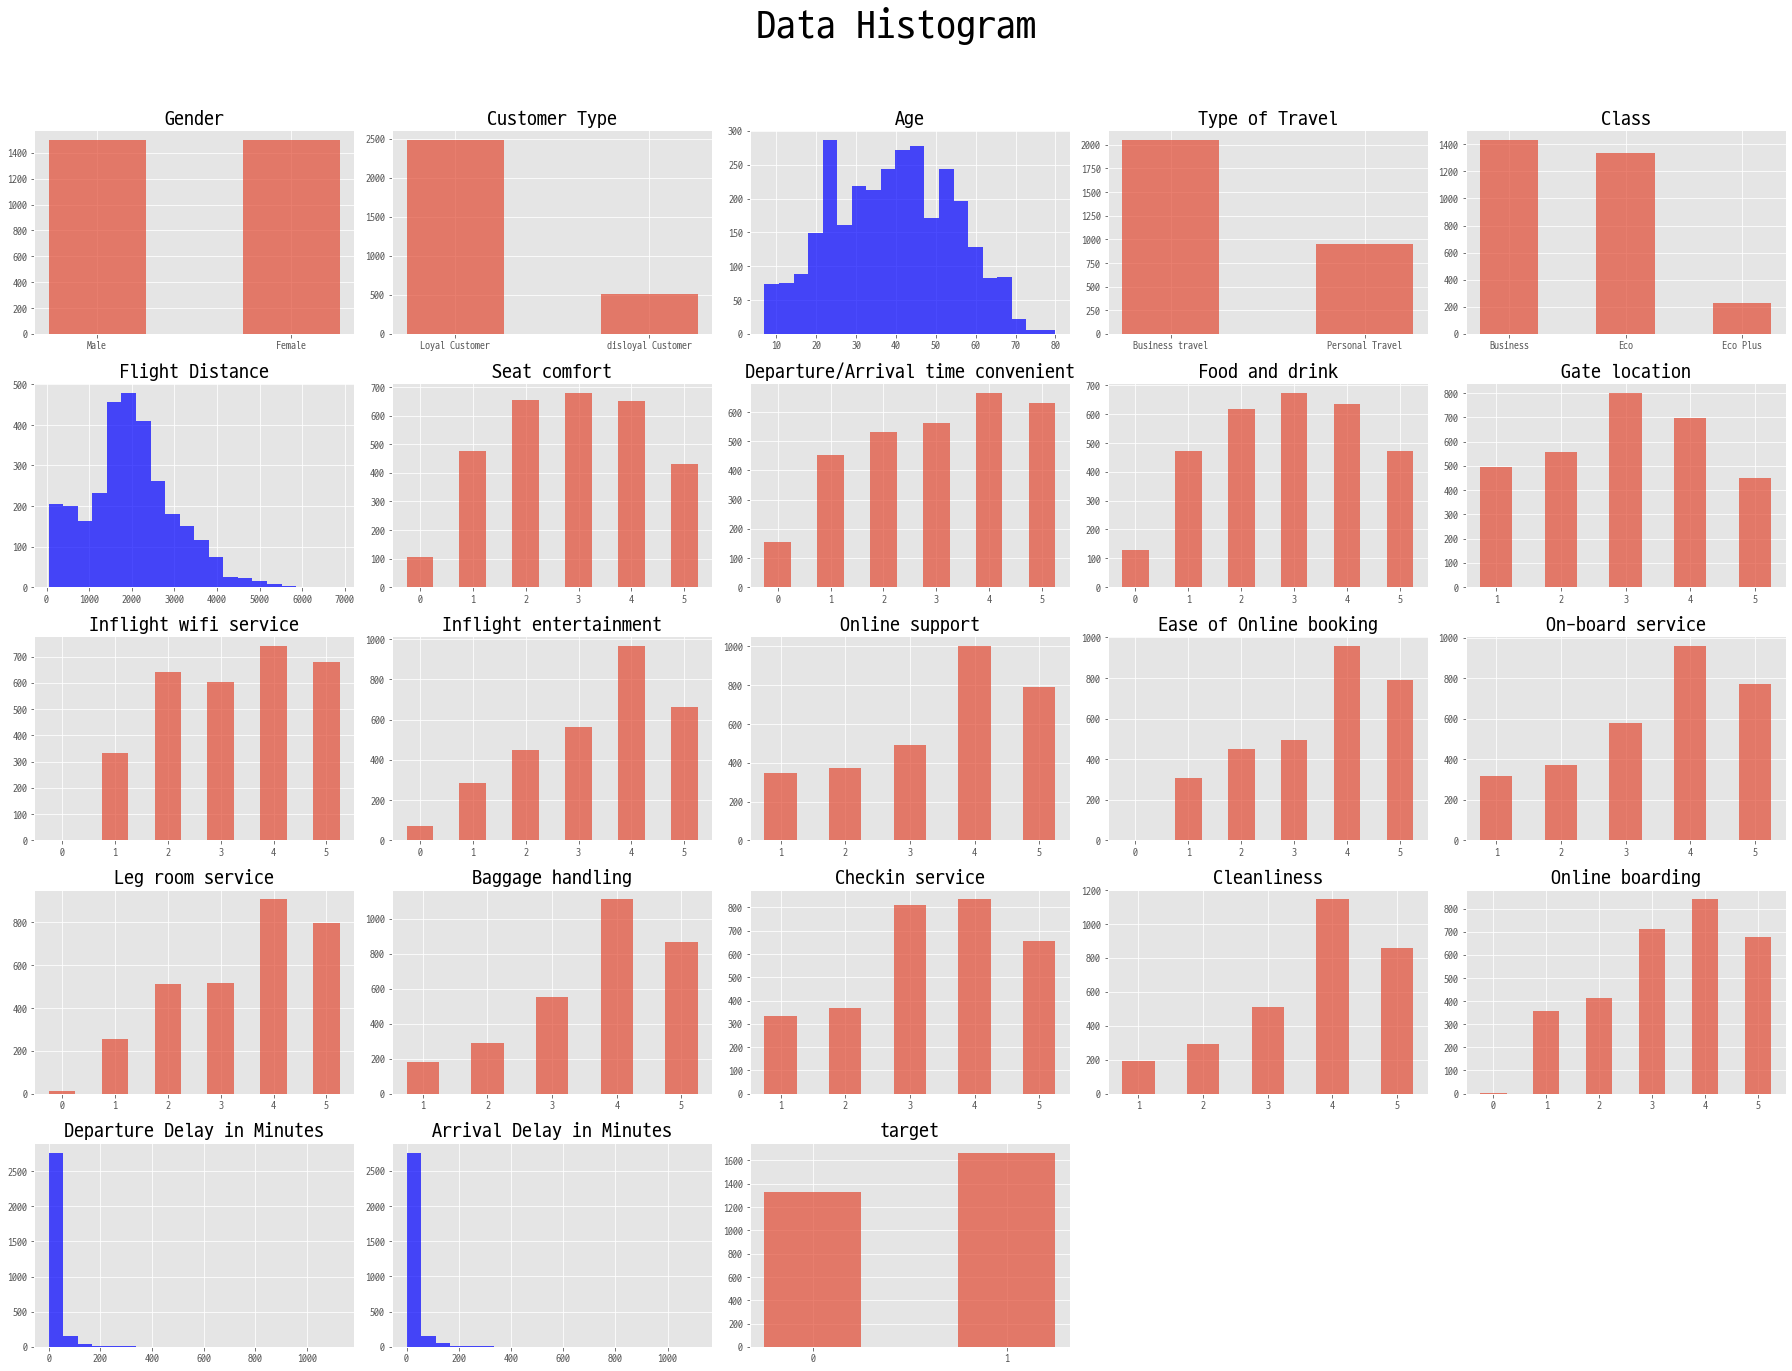

In [7]:
plt.style.use("ggplot")

# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = train.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

분석
- 카테고리형 변수 중 성별은 비슷한 비율을 유지하지만, 이외의 변수들은 분포의 차이가 큼
- Age, flight distance, Departure Delay와 Arrival Delay를 제외한 숫자형 변수들은 모두 0 ~ 5의 정수형 값만 존재함
- flight distance의 변수가 왼쪽으로 치우쳐져 있음
- Departure Delay와 Arrival Delay는 변수가 다양하나, 0 값이 많음 --> 딜레이가 있는 경우와 없는 경우로 분석

### target과 feature의 관계

In [10]:
categorical_feature

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

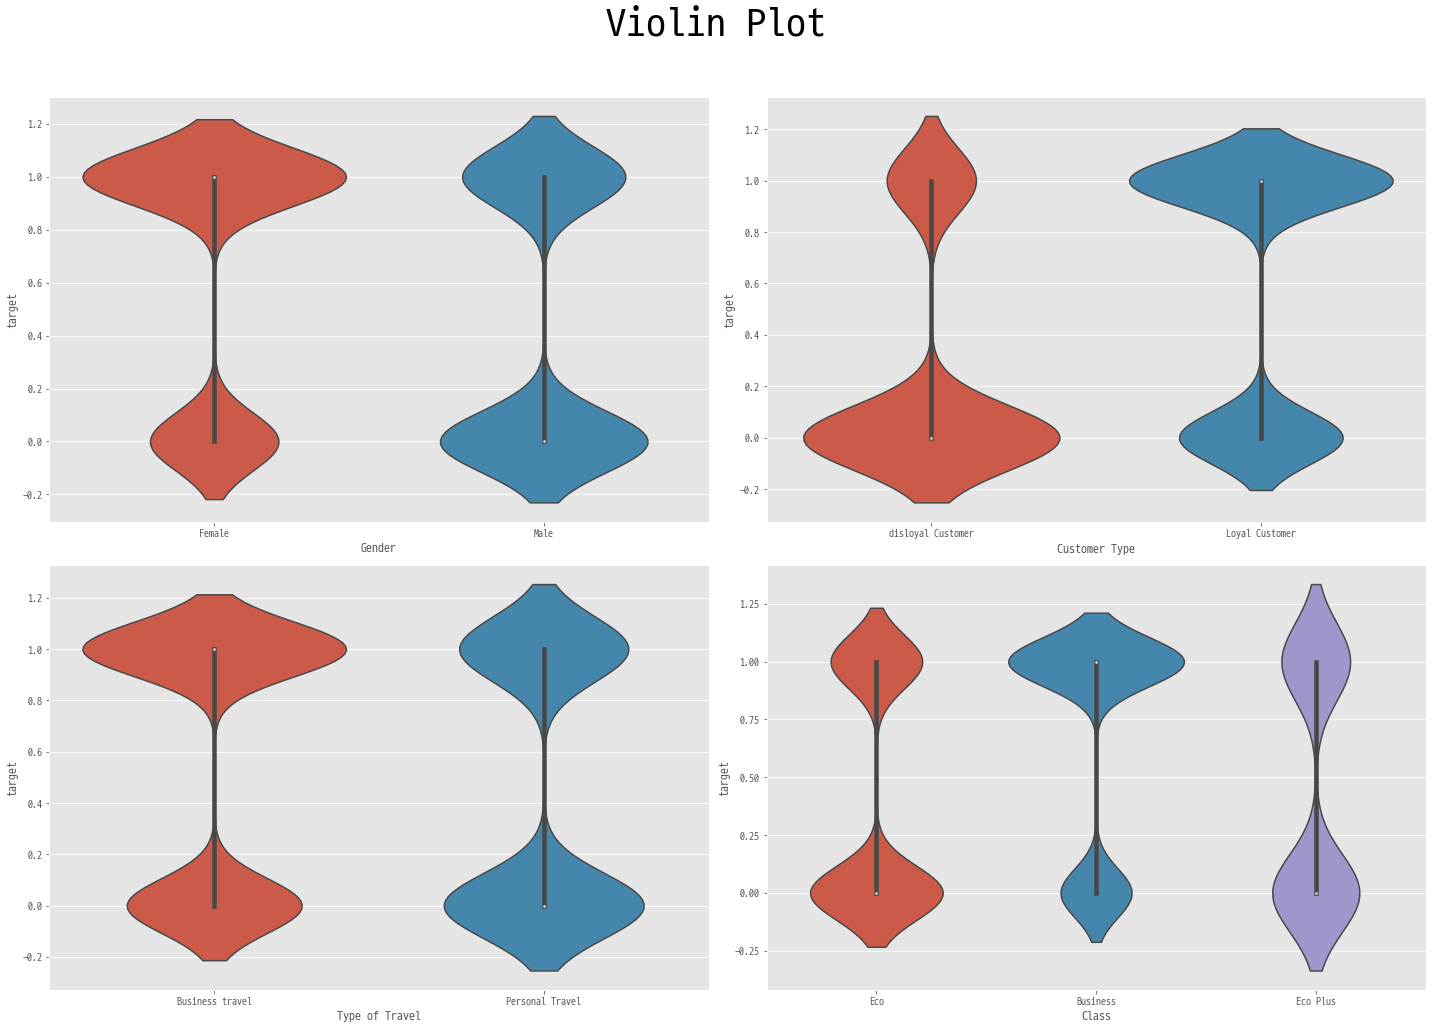

In [12]:
# 타겟 설정
target = "target"

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

for i, feature in enumerate(categorical_feature):
    plt.subplot(2,2,i+1)
    plt.xlabel(feature)
    plt.ylabel(target)
    sns.violinplot(x= train[feature], y= train[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

박스플롯을 보니 Customer Type 변수에서 disloyal인지 Loyal인지에 따라 만족도(target)이 상당히 차이가 나는 것을 확인할 수 있습니다. 

해당 변수는 예측에 있어 중요한 변수라고도 볼 수 있겠네요!

다음으로 수치형 데이터의 분포를 확인하기 위해 박스플롯을 그려봅니다.

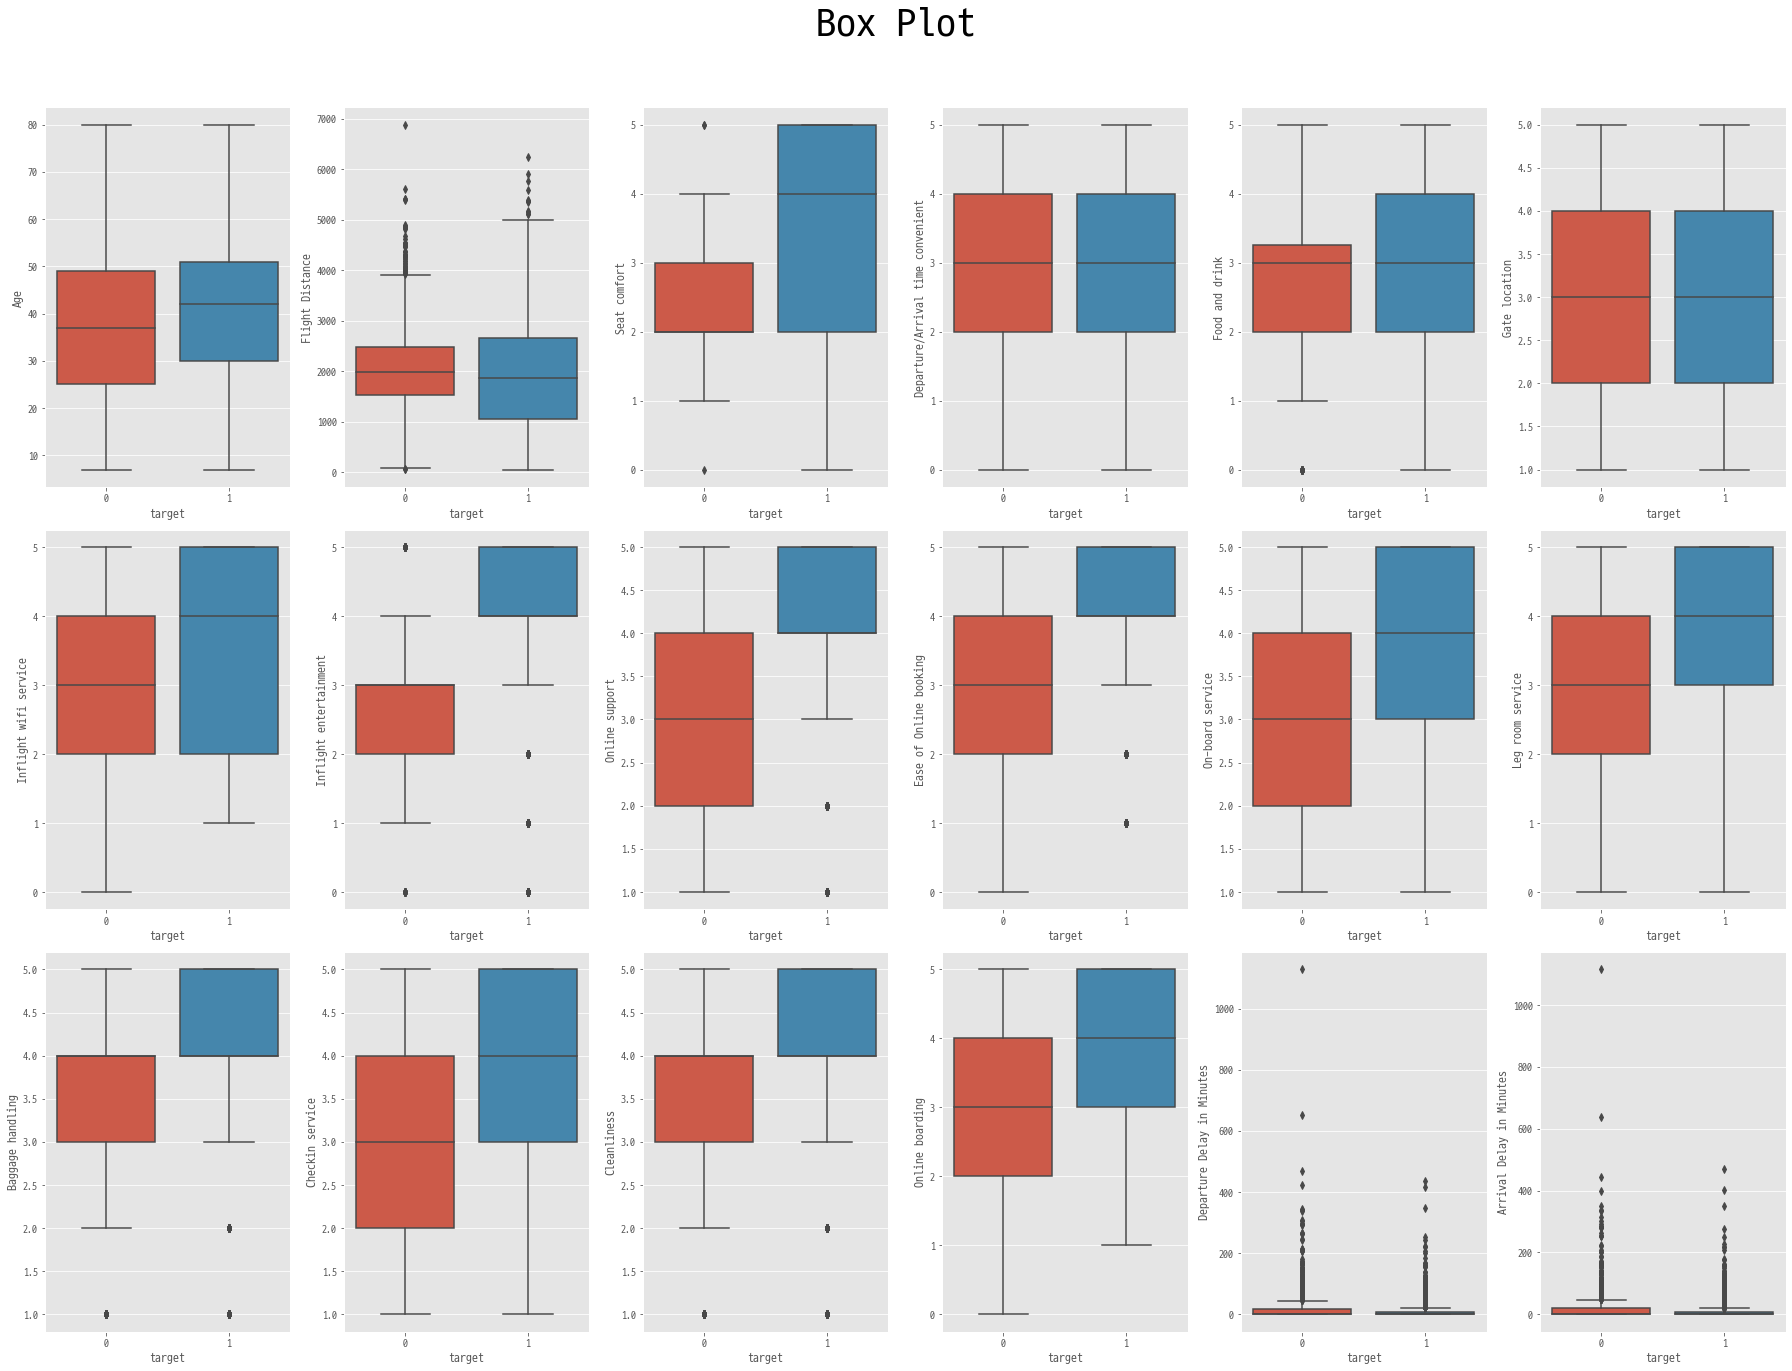

In [15]:
# 타겟 설정
target = "target"

plt.figure(figsize=(25, 20))
plt.suptitle("Box Plot", fontsize=40)

for i, feature in enumerate(numeric_feature, 1):
    plt.subplot(3,6,i)
    plt.xlabel(feature)
    plt.ylabel(target)
    sns.boxplot(x= train[target], y= train[feature])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

박스 플롯을 보니 age, Departure/Arrival time convenient, gate location 과 같은 변수는 target 에 영향이 없는 듯하네요. (이들은 분석에서 제거해도 무관할 듯 합니다!)

## 상관관계 시각화

feature들 간의 상관관계를 살펴보는 것은 분석에 많은 도움이 됩니다.

먼저 전체 feature들 간의 상관관계를 살펴보겠습니다.

In [16]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
corr_df = train.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

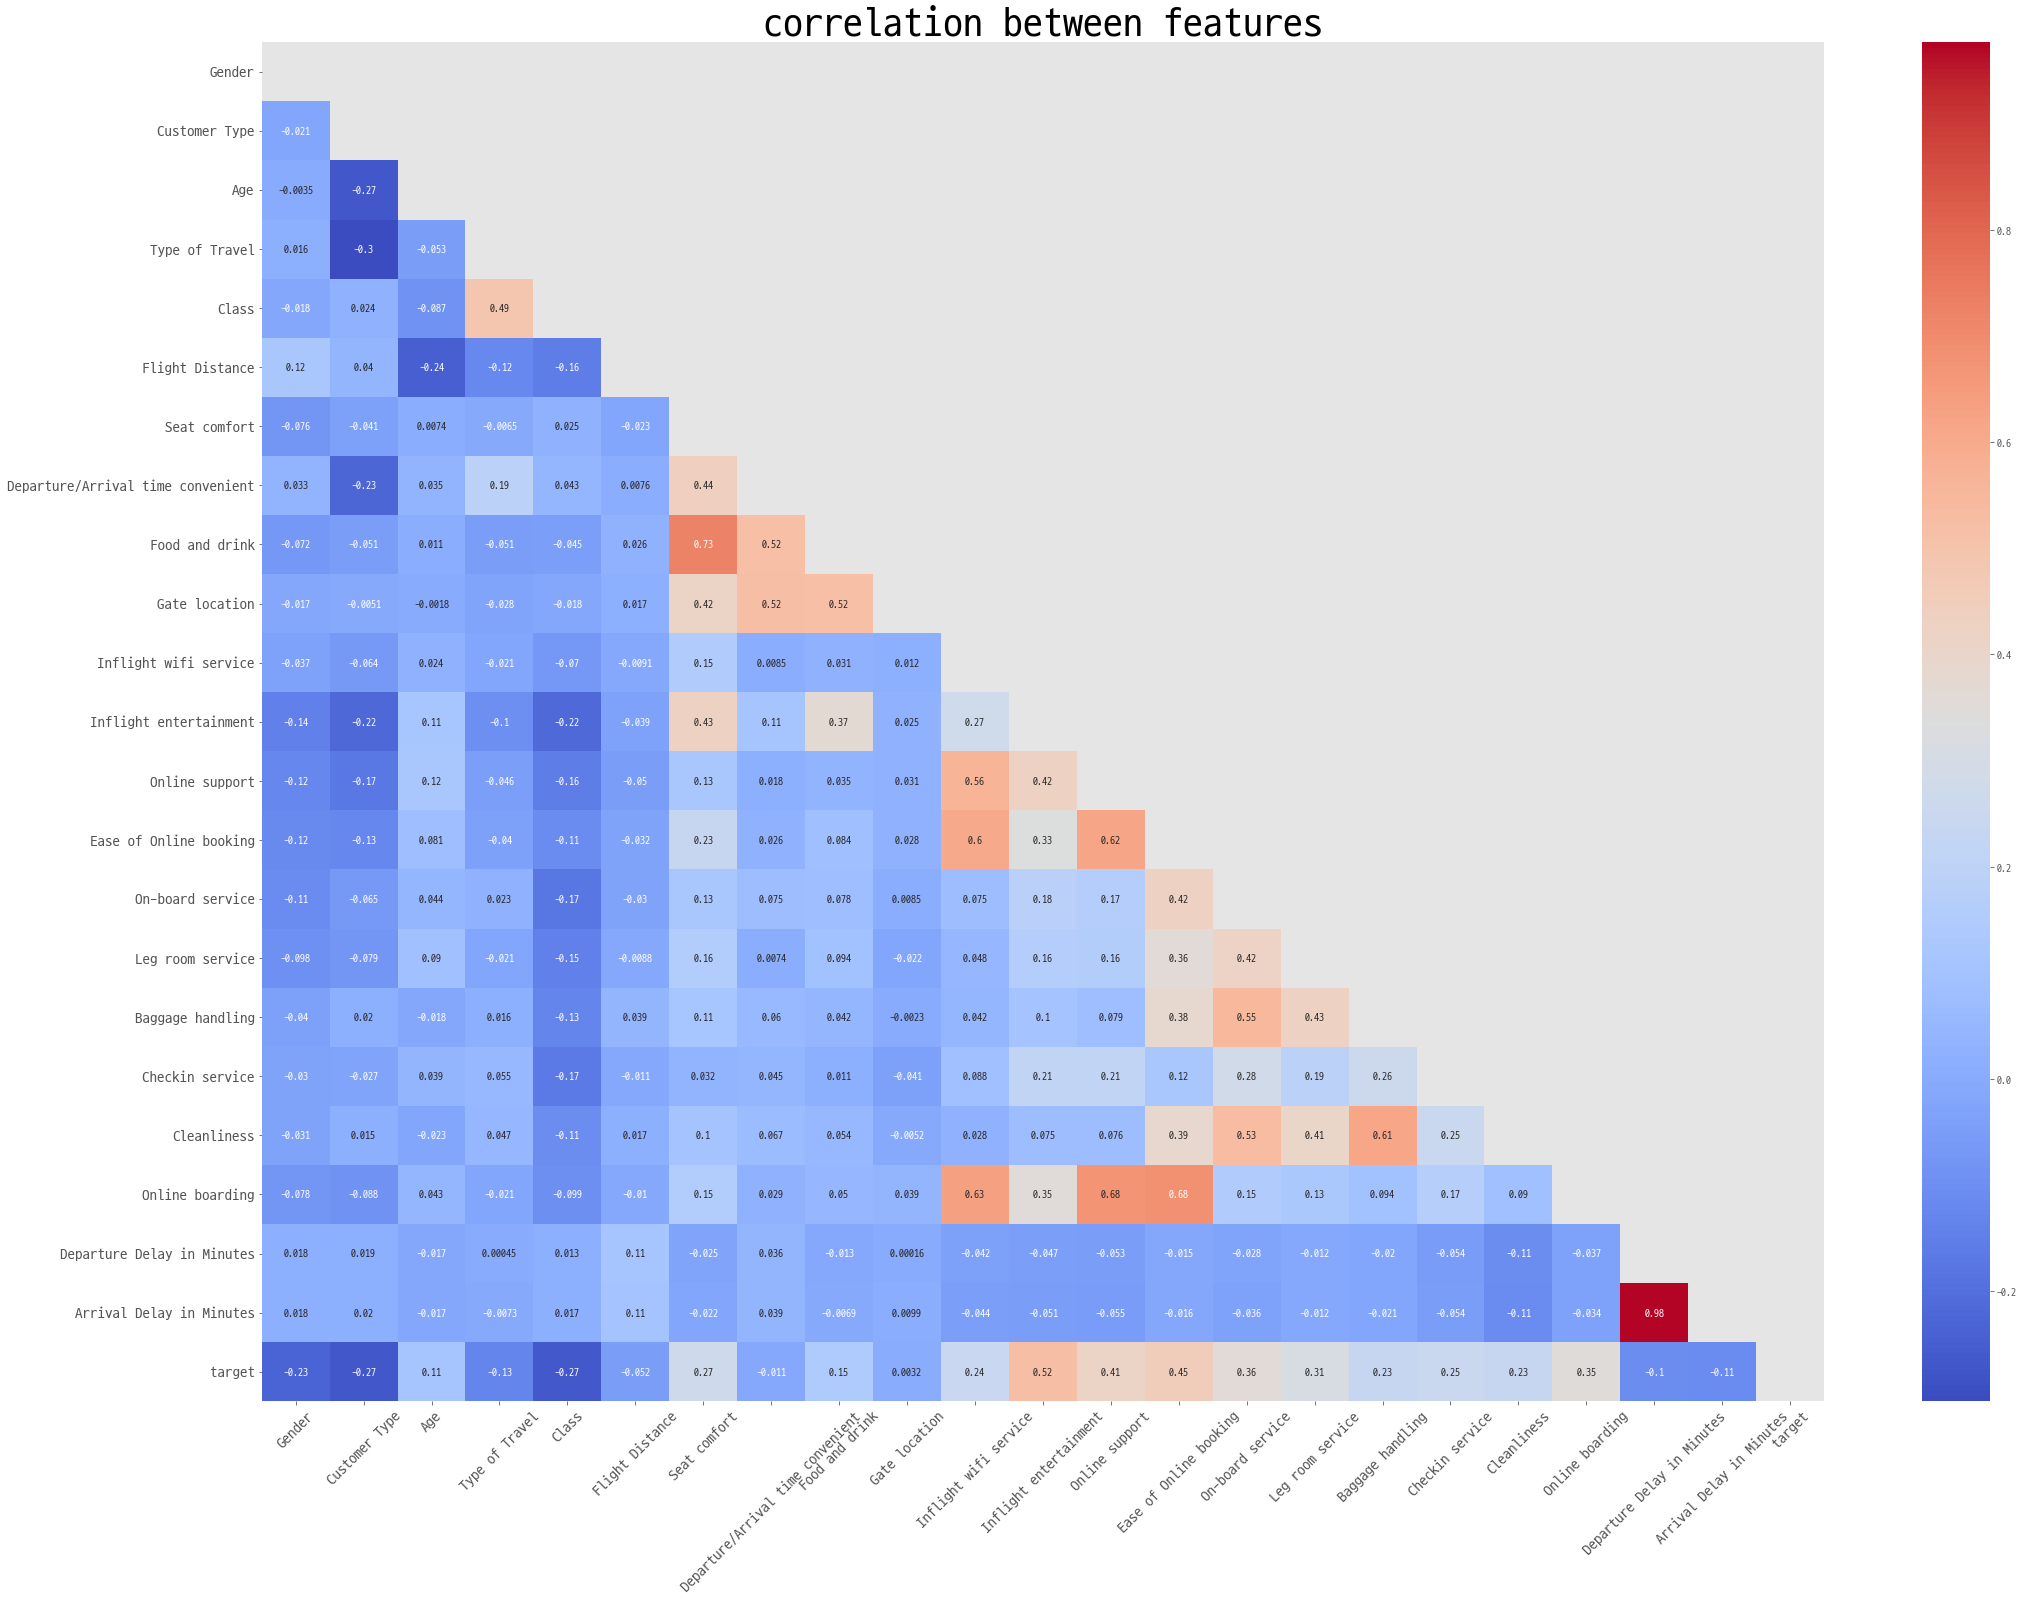

In [17]:
#상관관계 분석도
plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

고객 만족도인 target은 Inflight entertainment와 가장 높은 상관(0.52)을 보이네요!

그 이외에도 Online Support, Ease of Online booking, On-board service 와도 높은 상관을 보입니다.